In [2]:
# import pyspark
# spark = pyspark.sql.SparkSession.builder\
#     .master('local[*]')\
#     .appName('Shengwei\'s first spark notebook')\
#     .getOrCreate()

In [3]:
# df = spark.read.format("csv").option("header","true").load("accidents_2005_to_2007.csv")

In [1]:
import folium
from folium import plugins
import branca
import pandas as pd

In [2]:
# TODO load data from mongodb
df = pd.read_csv("accidents_2005_to_2007.csv")

/opt/conda/envs/bigdata/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [3]:
def ping_map(df, LSOA_of_Accident_Location, Year, zoom_start):
    df_filtered = df[(df["LSOA_of_Accident_Location"]==LSOA_of_Accident_Location)&(df["Year"]==Year)]
    location = (df_filtered["Latitude"].mean(),df_filtered["Longitude"].mean())
    uk_map = folium.Map(location=location,zoom_start=zoom_start)
    title_color = "#B0E0E6"
    value_color = "#F0F8FF"
    for index, row in df_filtered.iterrows():
        if row.Accident_Severity == 1:
            color = 'blue'
        elif row.Accident_Severity == 2:
            color = 'green'
        else:
            color = 'red'
        html_page = f"""<!DOCTYPE html>
                        <html>

                        <head>
                            <h2>Detailed Infomation of accident {row.Accident_Index}</h4>
                        </head>
                        <table style="height: 130px; width: 600px;">
                        <tbody>
                        <tr>
                        <td style="background-color: {title_color};"><div style="text-align: center;">Date</div></td>
                        <td style="width: 300px;background-color: {value_color};">{row.Date}</td>
                        </tr>
                        <tr>
                        <td style="background-color: {title_color};"><div style="text-align: center;">Number of Vehicles</div></td>
                        <td style="width: 300px;background-color: {value_color};">{row.Number_of_Vehicles}</td>
                        </tr>

                        <tr>
                        <td style="background-color: {title_color};"><div style="text-align: center;">Number of Casualties</div></td>
                        <td style="width: 300px;background-color: {value_color};">{row.Number_of_Casualties}</td>
                        </tr>

                        <tr>
                        <td style="background-color: {title_color};"><div style="text-align: center;">Time</div></td>
                        <td style="width: 300px;background-color: {value_color};">{row.Time}</td>
                        </tr>

                        <tr>
                        <td style="background-color: {title_color};"><div style="text-align: center;">Light Conditions</div></td>
                        <td style="width: 300px;background-color: {value_color};">{row.Light_Conditions}</td>
                        </tr>

                        <tr>
                        <td style="background-color: {title_color};"><div style="text-align: center;">Weather Conditions</div></td>
                        <td style="width: 300px;background-color: {value_color};">{row.Weather_Conditions}</td>
                        </tr>

                        <tr>
                        <td style="background-color: {title_color};width: 300px"><div style="text-align: center;">Road Surface Conditions</div></td>
                        <td style="width: 300px;background-color: {value_color};">{row.Road_Surface_Conditions}</td>
                        </tr>

                        <tr>
                        <td style="background-color: {title_color};width: 300px"><div style="text-align: center;">Road Type</div></td>
                        <td style="width: 300px;background-color: {value_color};">{row.Road_Type}</td>
                        </tr>

                        </tbody>
                        </table>
                        </html>
                        """
        iframe = branca.element.IFrame(html=html_page,width=600,height=300)
        popup = folium.Popup(iframe, parse_html=True) 
        folium.Marker([row.Latitude, row.Longitude],popup=popup, icon=folium.Icon(color=color, icon="remove-sign")).add_to(uk_map)
    return uk_map

In [4]:
LSOA_of_Accident_Location = "E01002849"
Year = 2005
zoom_start = 15
uk_map = ping_map(df,LSOA_of_Accident_Location,Year,zoom_start)

In [5]:
uk_map

In [20]:
def hitmap(df, LSOA_of_Accident_Location, Year, zoom_start, target_col):
    df_filtered = df[(df["LSOA_of_Accident_Location"]==LSOA_of_Accident_Location)&(df["Year"]==Year)]
    location = (df_filtered["Latitude"].mean(),df_filtered["Longitude"].mean())
    uk_map = folium.Map(location=location, zoom_start=zoom_start)
    
    data_heat = df_filtered[['Latitude','Longitude',target_col]].dropna().values.tolist()
    plugins.HeatMap(data_heat).add_to(uk_map)
    return uk_map

In [19]:
LSOA_of_Accident_Location = "E01002849"
Year = 2005
zoom_start = 15
target_col = "Number_of_Casualties"
uk_map = hitmap(df, LSOA_of_Accident_Location, Year, zoom_start, target_col)
uk_map

(51.490235, -0.19182911111111112)


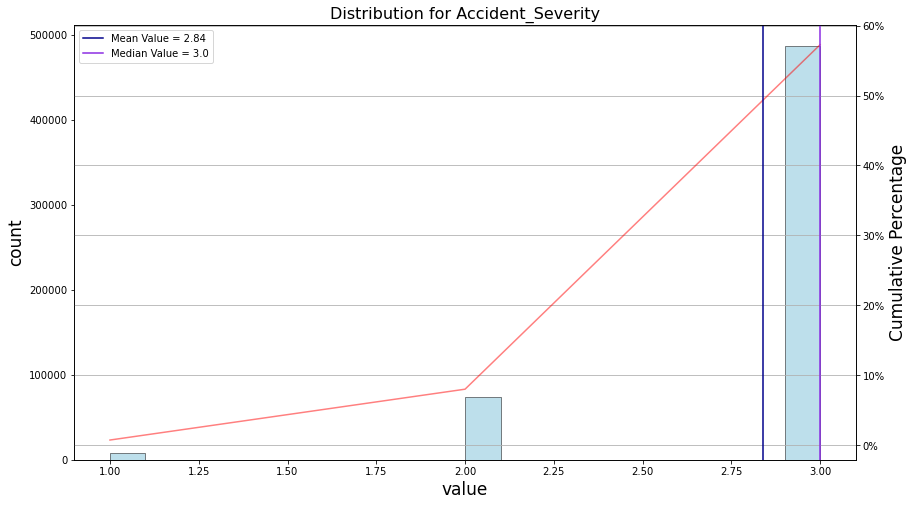

In [41]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick

def hist_plot(df, col, bins, bin_color = 'lightblue', add_cdf = False, add_mean = False, add_median = False, xlabel = '', ylabel = '', title = '', fig_w = 14, fig_h = 8, legend_loc = 'best'):
    fig, ax = plt.subplots(figsize = (fig_w, fig_h))

    df[col].hist(bins = bins, edgecolor = 'black', color = bin_color, alpha = 0.8, linewidth = 0.6)
    ax.grid(False)
    ax.set_xlabel(xlabel, fontsize = 17)
    ax.set_ylabel(ylabel, fontsize = 17)
    ax.set_title(title, fontsize = 16)

    if add_cdf:
        ax2 = ax.twinx()
        ax2.grid(True, which = 'both', axis = 'both')

        cdf = pd.DataFrame(df[col])
        cdf['cdf'] = cdf.rank(method='average', pct = True)
        cdf = cdf.sort_values(col)
        ax2.plot(cdf[col], cdf['cdf'] * 100, alpha = 0.5, color = 'red')
        ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

        ax2.set_ylabel('Cumulative Percentage', fontsize=17)

    if add_mean:
        mean_E = round(df[col].mean(),3)
        plt.axvline(x= mean_E, label='Mean Value = {}'.format(mean_E), \
            c = 'darkblue')

    if add_median:
        median_E = round(df[col].median(),3)
        plt.axvline(x= median_E, label='Median Value = {}'.format(median_E), \
            c = 'blueviolet')

    plt.legend(loc = legend_loc)
    return fig
target_col = "Accident_Severity"
f = hist_plot(df, target_col, bins=20, add_cdf=True, add_mean = True, add_median=True,xlabel='value', ylabel='count', title="Distribution for "+ target_col)

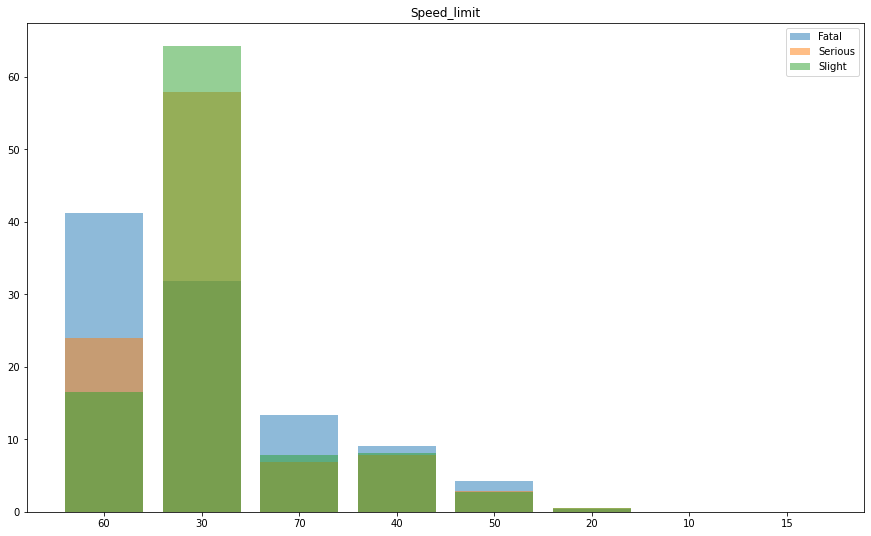

In [56]:
import matplotlib.pyplot as plt
import matplotlib

Acc_Sev_Dict = {1:"Fatal",
                2:"Serious",
                3:"Slight"}
plt.figure(1, figsize=(15,9))
for i in range(1,4):
    dis = df["Speed_limit"].loc[df["Accident_Severity"]==i].value_counts()
    dis = (dis/dis.sum())*100
    plt.bar(dis.index.astype(str), dis.values, alpha=0.50, label=Acc_Sev_Dict[i])

plt.legend()
plt.title("Speed_limit")
plt.show()

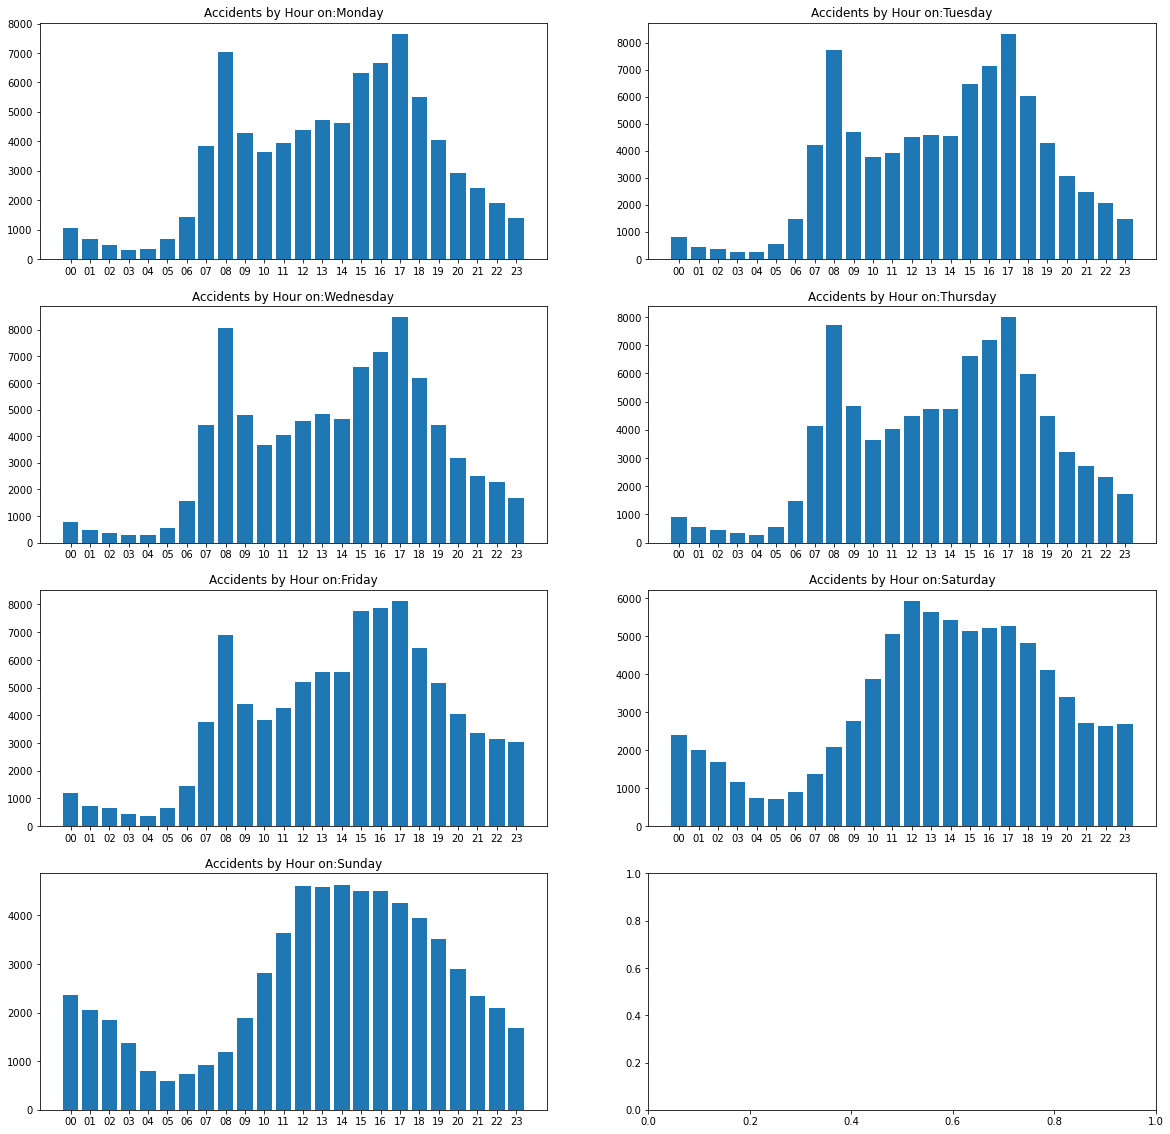

In [62]:
def find_pattern_in_day_of_week(df):
    day_of_week_map = {2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday", 1:"Sunday"}

    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20,20))

    df_manipulate = df
    df_manipulate["Hour"] = df.Time.str.slice(0,2)

    for i, col in enumerate(day_of_week_map.keys()):
        df_draw = df_manipulate[df_manipulate["Day_of_Week"]==col]["Hour"].value_counts().sort_index()
        ax[i//2, i%2].bar(df_draw.index, df_draw.values)
        ax[i//2, i%2].title.set_text("Accidents by Hour on:" + str(day_of_week_map.get(col)))

    plt.show()

find_pattern_in_day_of_week(df)